Wie gut war das Modell tatsaechlich im Feld?

In [72]:
import pandas as pd
import pickle
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt


In [2]:
df = pickle.load(open( '../00_data/cleaned/predictions.pkl','rb') )
df = df[['ID','UebungsID','UserID','SatzID','prediction','modus','interventiongroup','Minute']]

xmlsaetze = pickle.load(open( '../00_data/cleaned/xmlsaetze.pkl','rb') )
xmlsaetze['Minute'] = pd.to_datetime(xmlsaetze['Datum']).dt.minute
xmlsaetze = xmlsaetze[['ID','UebungsID','UserID','SatzID','Erfolg','Minute','MehrfachFalsch','Testposition']]

df_merged = pd.merge(xmlsaetze, df, on=['UserID','UebungsID','SatzID','Minute'])

In [66]:
vergleich = df_merged[['Erfolg','prediction']]

def test(vergleich):
    # if(vergleich.prediction > 0.4 and vergleich.prediction < 0.6):
    #     return 2
    if(vergleich.Erfolg == True):
        if(vergleich.prediction>0.5):
            return 1 #true positiv
        else:
            return 0 # false negativ
    elif(vergleich.Erfolg == False):
        if(vergleich.prediction<0.5):
            return 3 #true negative
        else:
            return 4 # false positiv
    else:
        return  0


vergleich['correct'] = df_merged.apply (lambda row: test(row), axis=1)
vergleich_grouped = vergleich.groupby(['correct'])['Erfolg'].count()
vergleich_grouped

C:\Users\Nathalie\AppData\Local\Temp\ipykernel_8904\2974134672.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vergleich['correct'] = df_merged.apply (lambda row: test(row), axis=1)


correct
0     52401
1    374070
3    161230
4     81297
Name: Erfolg, dtype: int64

In [67]:
precision = 374070 / (374070 + 81297)
recall = 374070 / (374070 + 52401)
accuracy = (374070+161230)/ (374070+161230+81297+52401)

In [62]:
## ohne werte zwischen 0.4 und 0.6
# precision = 374070 / (374070 + 81275)
# recall = 374070 / (374070 + 26594)
# accuracy = (374070+141554)/ (374070+141554+81275+26594)

In [68]:
accuracy

0.8001518689144064

In [69]:
recall

0.8771288082894265

In [70]:
precision

0.8214692764297808

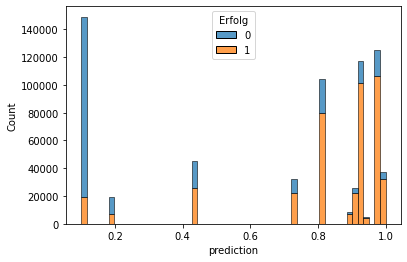

In [82]:
g=sns.histplot(data=vergleich, x='prediction',hue='Erfolg',multiple="stack")
sns.move_legend(g, "upper center")


<AxesSubplot:xlabel='Pred_binaer', ylabel='count'>

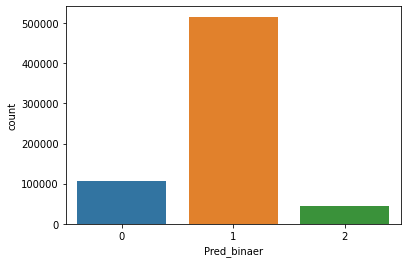

In [6]:
sns.countplot(data=vergleich, x=vergleich.Pred_binaer)